# Project 2 report

*Student name: Chang Lu*

*Student number: s2157323*

*In this project, we pick china as the aim area for analysis.*

*First, we took an overall observation with change of PM2.5 in each province, to see the overall changes. Then use K-Means clustering method to divide the province of similar pattern into one category. The numbers of clusters are determined by the ESS features(an evaluating indicator) with the number of clusters. Then draw the pictures of each clusters to show the similar changing method in the same clusters and show the difference pattern of pictures in different clusters.*

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openaq
import warnings
from sklearn.cluster import KMeans

warnings.simplefilter('ignore')

%matplotlib inline

# Set major seaborn asthetics
sns.set("notebook", style='ticks', font_scale=1.0)

# Increase the quality of inline plots
mpl.rcParams['figure.dpi']= 500

print ("pandas v{}".format(pd.__version__))
print ("matplotlib v{}".format(mpl.__version__))
print ("seaborn v{}".format(sns.__version__))
print ("openaq v{}".format(openaq.__version__))

pandas v1.1.3
matplotlib v3.3.1
seaborn v0.11.0
openaq v1.1.0


In [27]:
import openaq
api = openaq.OpenAQ()

In [28]:
locations = api.locations(city = '北京市', df=True)
df = api.measurements(city = '北京市', location = locations['locations'][0],parameter = 'pm25', limit=50000, df=True)
df

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-08-09 19:00:00,奥体中心,pm25,10,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2021-08-09 11:00:00+00:00,39.9821,116.3966
2021-08-08 16:00:00,奥体中心,pm25,32,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2021-08-08 08:00:00+00:00,39.9821,116.3966
2021-08-08 15:00:00,奥体中心,pm25,49,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2021-08-08 07:00:00+00:00,39.9821,116.3966
2021-08-08 14:00:00,奥体中心,pm25,50,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2021-08-08 06:00:00+00:00,39.9821,116.3966
2021-08-08 13:00:00,奥体中心,pm25,50,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2021-08-08 05:00:00+00:00,39.9821,116.3966
...,...,...,...,...,...,...,...,...,...
2018-10-18 00:00:00,奥体中心,pm25,29,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2018-10-17 16:00:00+00:00,40.0031,116.4070
2018-10-17 23:00:00,奥体中心,pm25,43,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2018-10-17 15:00:00+00:00,40.0031,116.4070
2018-10-17 23:00:00,奥体中心,pm25,39,b'\xc2\xb5g/m\xc2\xb3',CN,北京市,2018-10-17 15:00:00+00:00,39.9821,116.3966


In [37]:
# set a list to store all cities of China
provincial_capital = ['济南市','北京市','上海市','天津市','重庆市','哈尔滨市',
                     '长春市','沈阳市','呼和浩特市','石家庄市','乌鲁木齐市','兰州市','西宁市',
                     '西安市','银川市','郑州市','太原市','合肥市','武汉市','长沙市','南京市',
                     '成都市','贵阳市','昆明市','南宁市','拉萨市','杭州市','南昌市','广州市',
                     '福州市','海口市']
# calculate pm_seires, it is the time series of mean value with PM2.5 of each city
pm_series = pd.DataFrame()
for i in range(len(provincial_capital)):
    city = provincial_capital[i]
    locations = api.locations(city = city, df=True)
    df = api.measurements(city = city, location = locations['locations'][0],parameter = 'pm25', limit=50000, df=True)
    year = []
    month = []
    for j in range(len(df)):
        year.append(df['date.utc'][j].year)
        month.append(df['date.utc'][j].month)
    df['year'] = year
    df['month'] = month
    result = df.groupby(['year','month']).mean()['value']
    pm_series[city] = result
pm_series.to_csv('pm_series.csv')
pm_series = pd.read_csv('pm_series.csv')

*check the nan value in series, we can find that there are two series contain nan value,"呼和浩特市" and "乌鲁木齐市".*

In [5]:
pm_series.isnull().any()

year     False
month    False
济南市      False
北京市      False
上海市      False
天津市      False
重庆市      False
哈尔滨市     False
长春市      False
沈阳市      False
呼和浩特市     True
石家庄市     False
乌鲁木齐市     True
兰州市      False
西宁市      False
西安市      False
银川市      False
郑州市      False
太原市      False
合肥市      False
武汉市      False
长沙市      False
南京市      False
成都市      False
贵阳市      False
昆明市      False
南宁市      False
拉萨市      False
杭州市      False
南昌市      False
广州市      False
福州市      False
海口市      False
dtype: bool

*Observing the condition of 'NAN' for '呼和浩特市'.*

*From the result we can see that this columns missing almost half of values in front, so just delete this whole column for better anlysis.*

In [6]:
pm_series['呼和浩特市']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15    160.681922
16     45.986765
17     24.502128
18     22.784689
19     24.489028
20     18.838284
21     19.486239
22     16.287812
23     15.538690
24     28.779845
25     35.706260
26     42.085366
27     49.483721
28     41.128801
29     55.552469
30     27.386640
31     29.812352
32     17.122768
33     11.849057
34     52.618421
Name: 呼和浩特市, dtype: float64

In [7]:
pm_series = pm_series.drop('呼和浩特市',axis = 1)

*Check the result for '乌鲁木齐市'.*

*Here only exist one NAN value, so just use the average value of data before and after to fit this value.*

In [8]:
pm_series['乌鲁木齐市']

0      50.215190
1      92.191919
2     140.928571
3     190.217759
4     147.052632
5     109.331658
6      27.229483
7      34.248538
8      24.134513
9      28.599388
10     24.922426
11     27.205247
12     43.947214
13     78.946023
14    146.760055
15    204.833561
16    108.723122
17     41.537063
18     33.915385
19     28.781646
20     27.745267
21     26.662566
22           NaN
23     18.062044
24     40.246177
25     54.780291
26    199.796848
27    167.410413
28    153.038462
29     59.611916
30     24.028689
31     33.672131
32     21.089412
33     26.173077
34     27.625000
Name: 乌鲁木齐市, dtype: float64

In [9]:
pm_series['乌鲁木齐市'][22] = (pm_series['乌鲁木齐市'][21] + pm_series['乌鲁木齐市'][23])/2

*Transpose data in order to let python know that each province is a variable, not the date.*

In [10]:
dataset = pm_series.iloc[:,2:].stack()
dataset = dataset.unstack(0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
济南市,55.842553,104.841837,75.238554,121.341463,102.206827,64.224165,52.627628,36.341360,33.179396,33.568276,...,64.408428,89.645907,82.093702,56.007168,63.220497,37.468041,36.566745,28.824444,22.250696,26.671233
北京市,36.464358,65.413445,44.037585,65.610459,57.015733,49.857932,43.978863,33.565066,32.485950,32.107044,...,38.899213,28.099145,40.246988,62.515734,86.754198,36.302000,26.250559,20.806522,16.822581,36.467532
上海市,31.609562,40.115578,33.940639,50.030369,39.406615,50.209340,37.990712,31.400000,27.271215,25.097796,...,27.293651,40.115917,39.459091,29.519298,38.104938,33.122917,28.103175,22.482143,15.834239,11.078947
天津市,47.823529,85.843854,48.870968,93.223404,88.366667,55.003145,50.403226,44.527817,42.439868,43.000000,...,48.498387,46.932384,49.978261,59.767986,75.349379,43.739308,33.227991,36.106904,27.773842,46.740260
重庆市,49.281938,50.567291,55.712871,80.890585,49.664557,51.001585,30.033923,34.233051,27.355593,21.495690,...,37.755738,56.154514,62.321267,54.419014,33.197550,25.758065,29.338824,29.841410,17.502703,28.909091
哈尔滨市,17.679688,29.571924,49.574419,75.637363,115.119748,47.992063,33.849415,19.258840,10.921642,16.152055,...,40.509615,46.652557,71.441718,53.396853,38.681115,46.913131,18.993072,14.239468,12.361111,21.146667
长春市,36.808000,45.119250,43.266827,76.710870,85.052083,56.950658,33.055556,21.212885,16.688742,20.868715,...,40.610577,34.968750,51.410687,52.473498,44.566978,48.274029,24.107062,12.139073,13.346883,21.013158
沈阳市,43.586498,53.756219,46.465011,82.008439,82.431290,62.940439,43.850812,35.056818,22.225376,27.668050,...,48.496764,48.200351,67.472308,47.180212,69.098462,39.991935,28.431461,18.310722,18.348525,22.558442
石家庄市,43.034417,70.405405,67.244186,97.799578,72.518519,63.065109,47.869310,35.393211,32.991319,28.489712,...,48.998410,79.285965,66.897356,71.460550,86.450000,44.484787,43.824324,32.760965,27.738544,34.972222
乌鲁木齐市,50.215190,92.191919,140.928571,190.217759,147.052632,109.331658,27.229483,34.248538,24.134513,28.599388,...,54.780291,199.796848,167.410413,153.038462,59.611916,24.028689,33.672131,21.089412,26.173077,27.625000


*Use 'silhouette_score' from 'sklearn.metrics' to see the scores of different division. This score indicate the effect of clustering, smaller value represent a better result of clustering.*

*It is easy to understand more clusters indicates better result, with no doubts that dividing the date into clusters as much as possible will bring a good outcome. But obvioursly we can not do this, since such behavior just makes no senses. So we just choose the clusters number which is not so larger, but can also bring a reslut which is not bad, and in this data the cluster numbers = 6.*

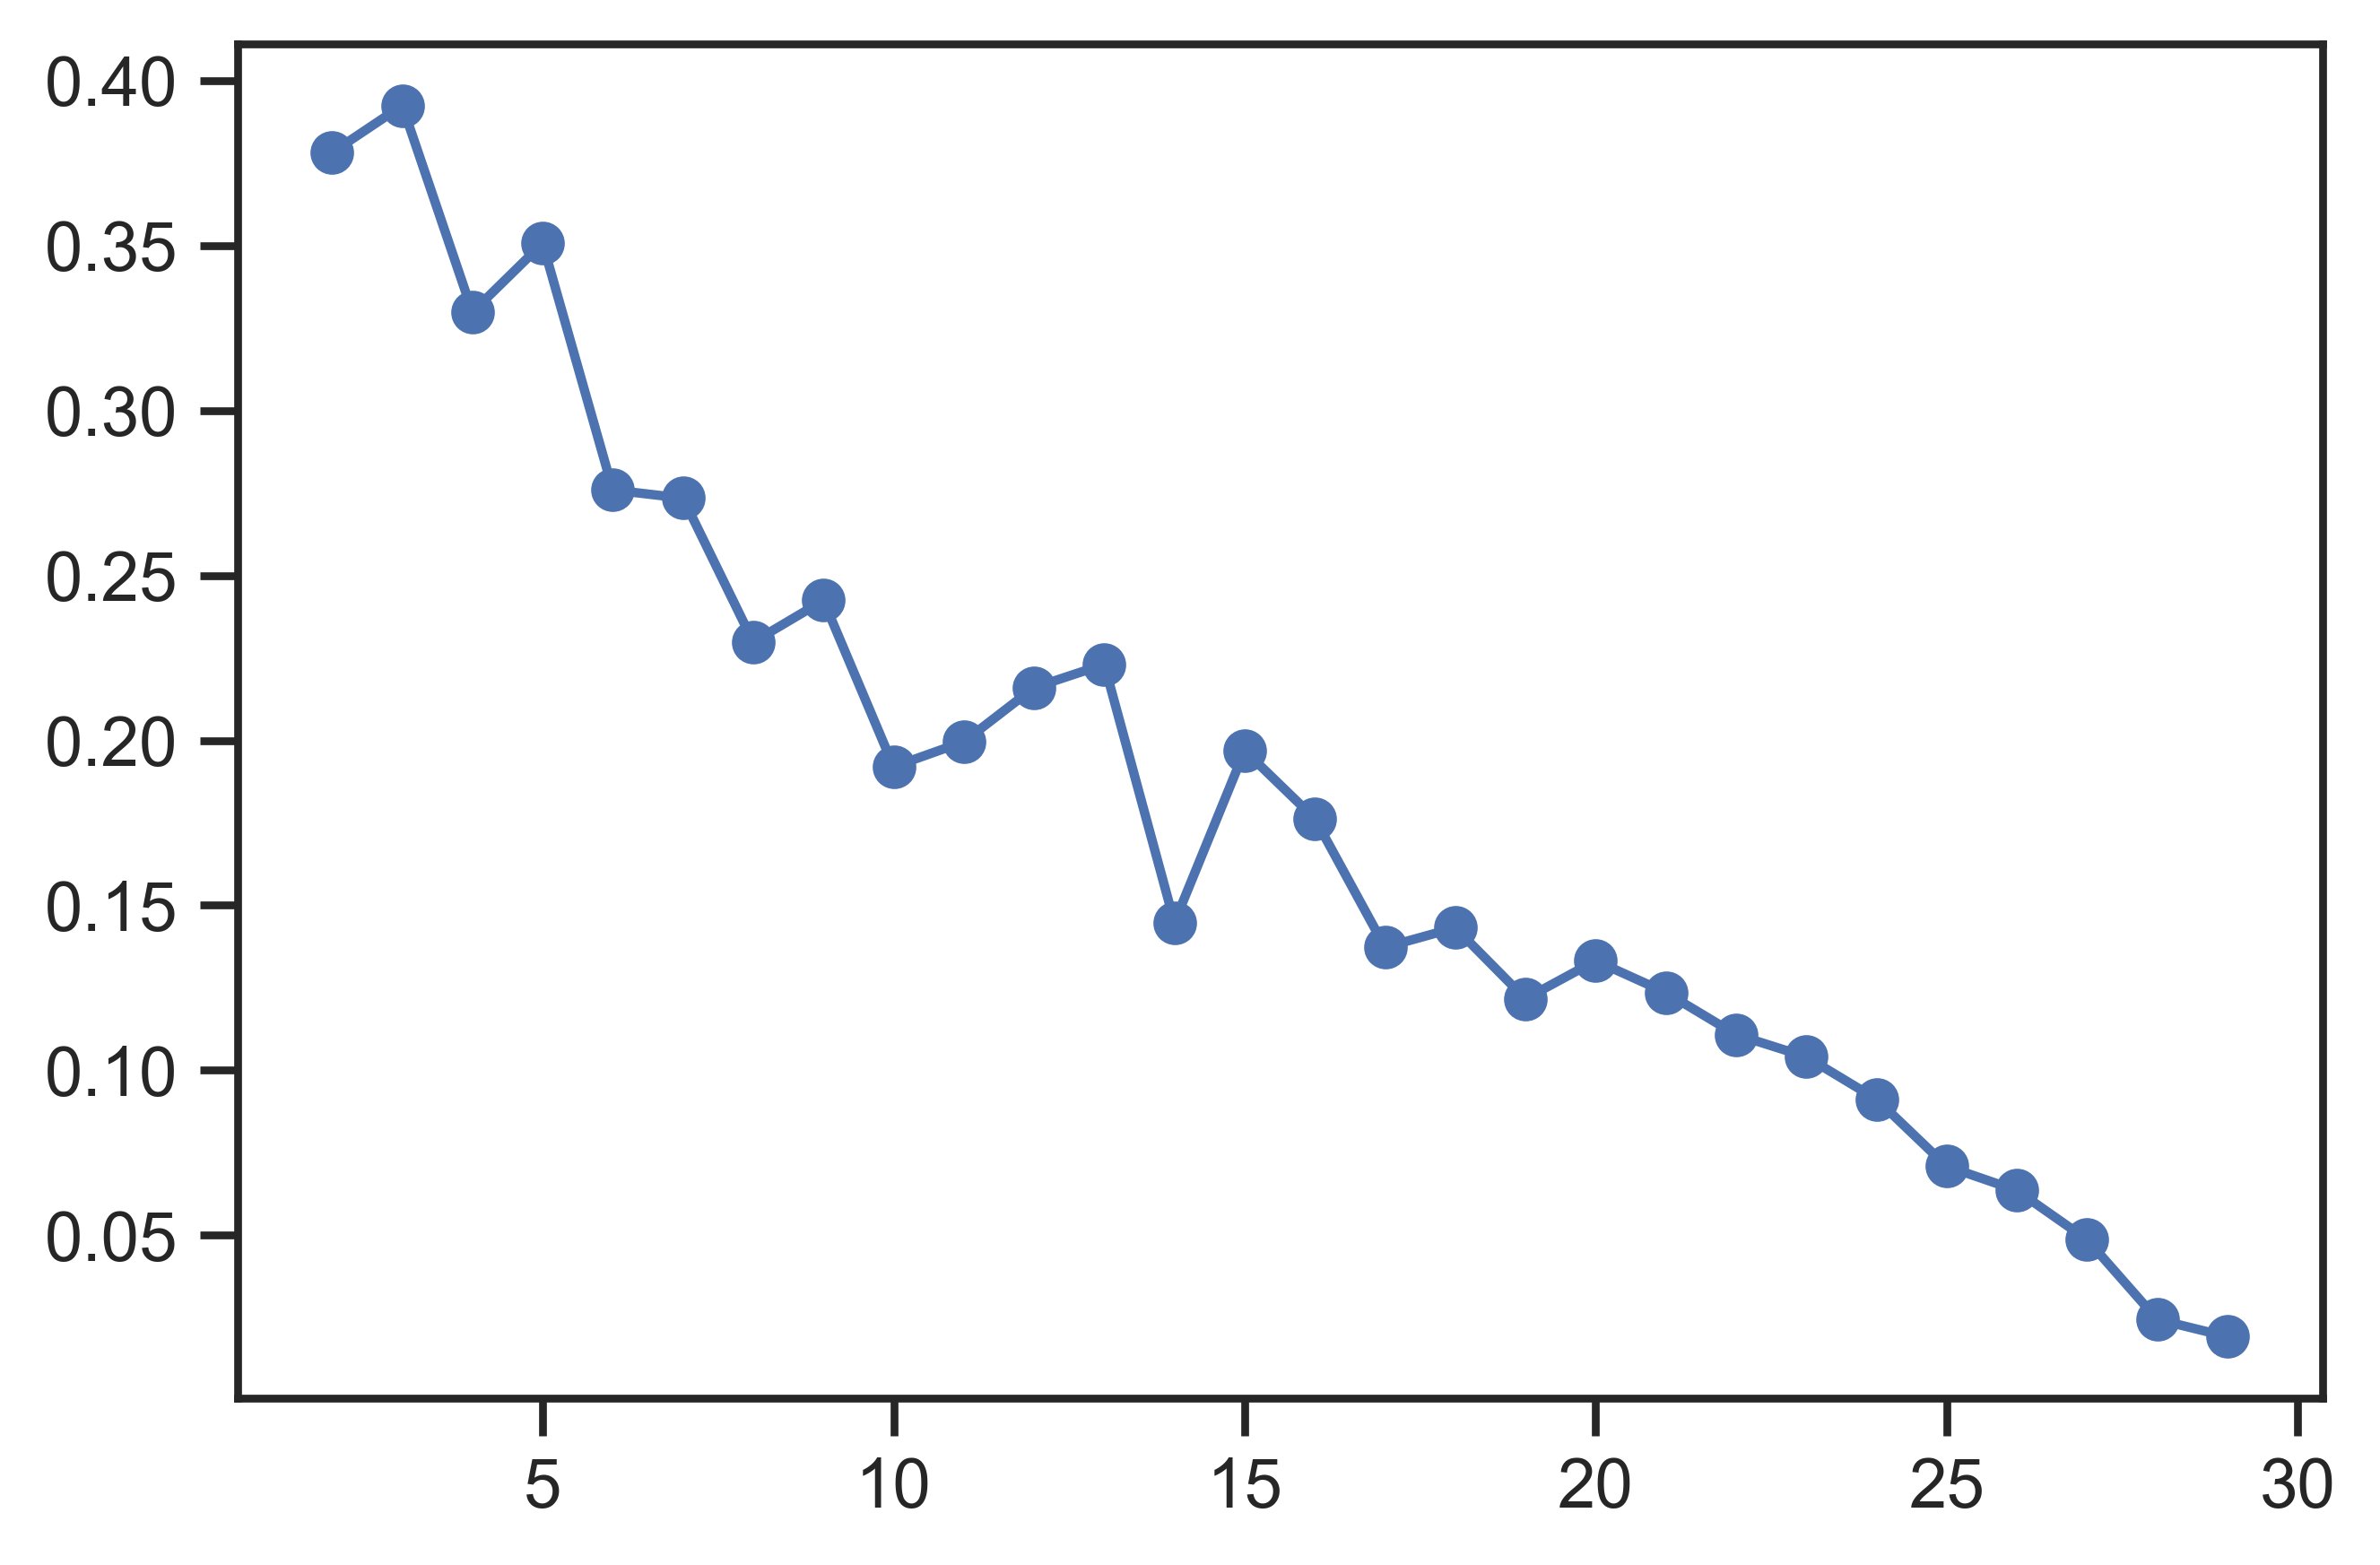

In [11]:
from sklearn.metrics import silhouette_score
Scores = [] 
for k in range(2,len(dataset)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset)
    Scores.append(silhouette_score(dataset,kmeans.labels_,metric='euclidean'))
X = range(2,len(dataset))
plt.plot(X,Scores,'o-')
plt.show()

*assigning the result of clustering to dataset*

In [12]:
y_pred = KMeans(n_clusters=6, random_state=9).fit_predict(dataset)

In [13]:
dataset['class'] = y_pred

*Since it is difficult to draw all pictures into one canvas. So I just plot them separately.*

*From the results we can easily find the difference between two cluters and observe the similarity of pattern for pictures at the same cluster.*

In [33]:
X = pd.date_range('10/1/2018','09/1/2021',freq='BM')

In [14]:
class0_sample = dataset[dataset['class'] == 0].iloc[:,:35]
class0_index = class0_sample.index[:]
class0_index

Index(['哈尔滨市', '长春市', '沈阳市'], dtype='object')

*First cluster cantains 3 cities:'哈尔滨市', '长春市', '沈阳市'.*

*From the picture we can see that the change of data are similar, all have 4 peak value, which appear at the same period.*

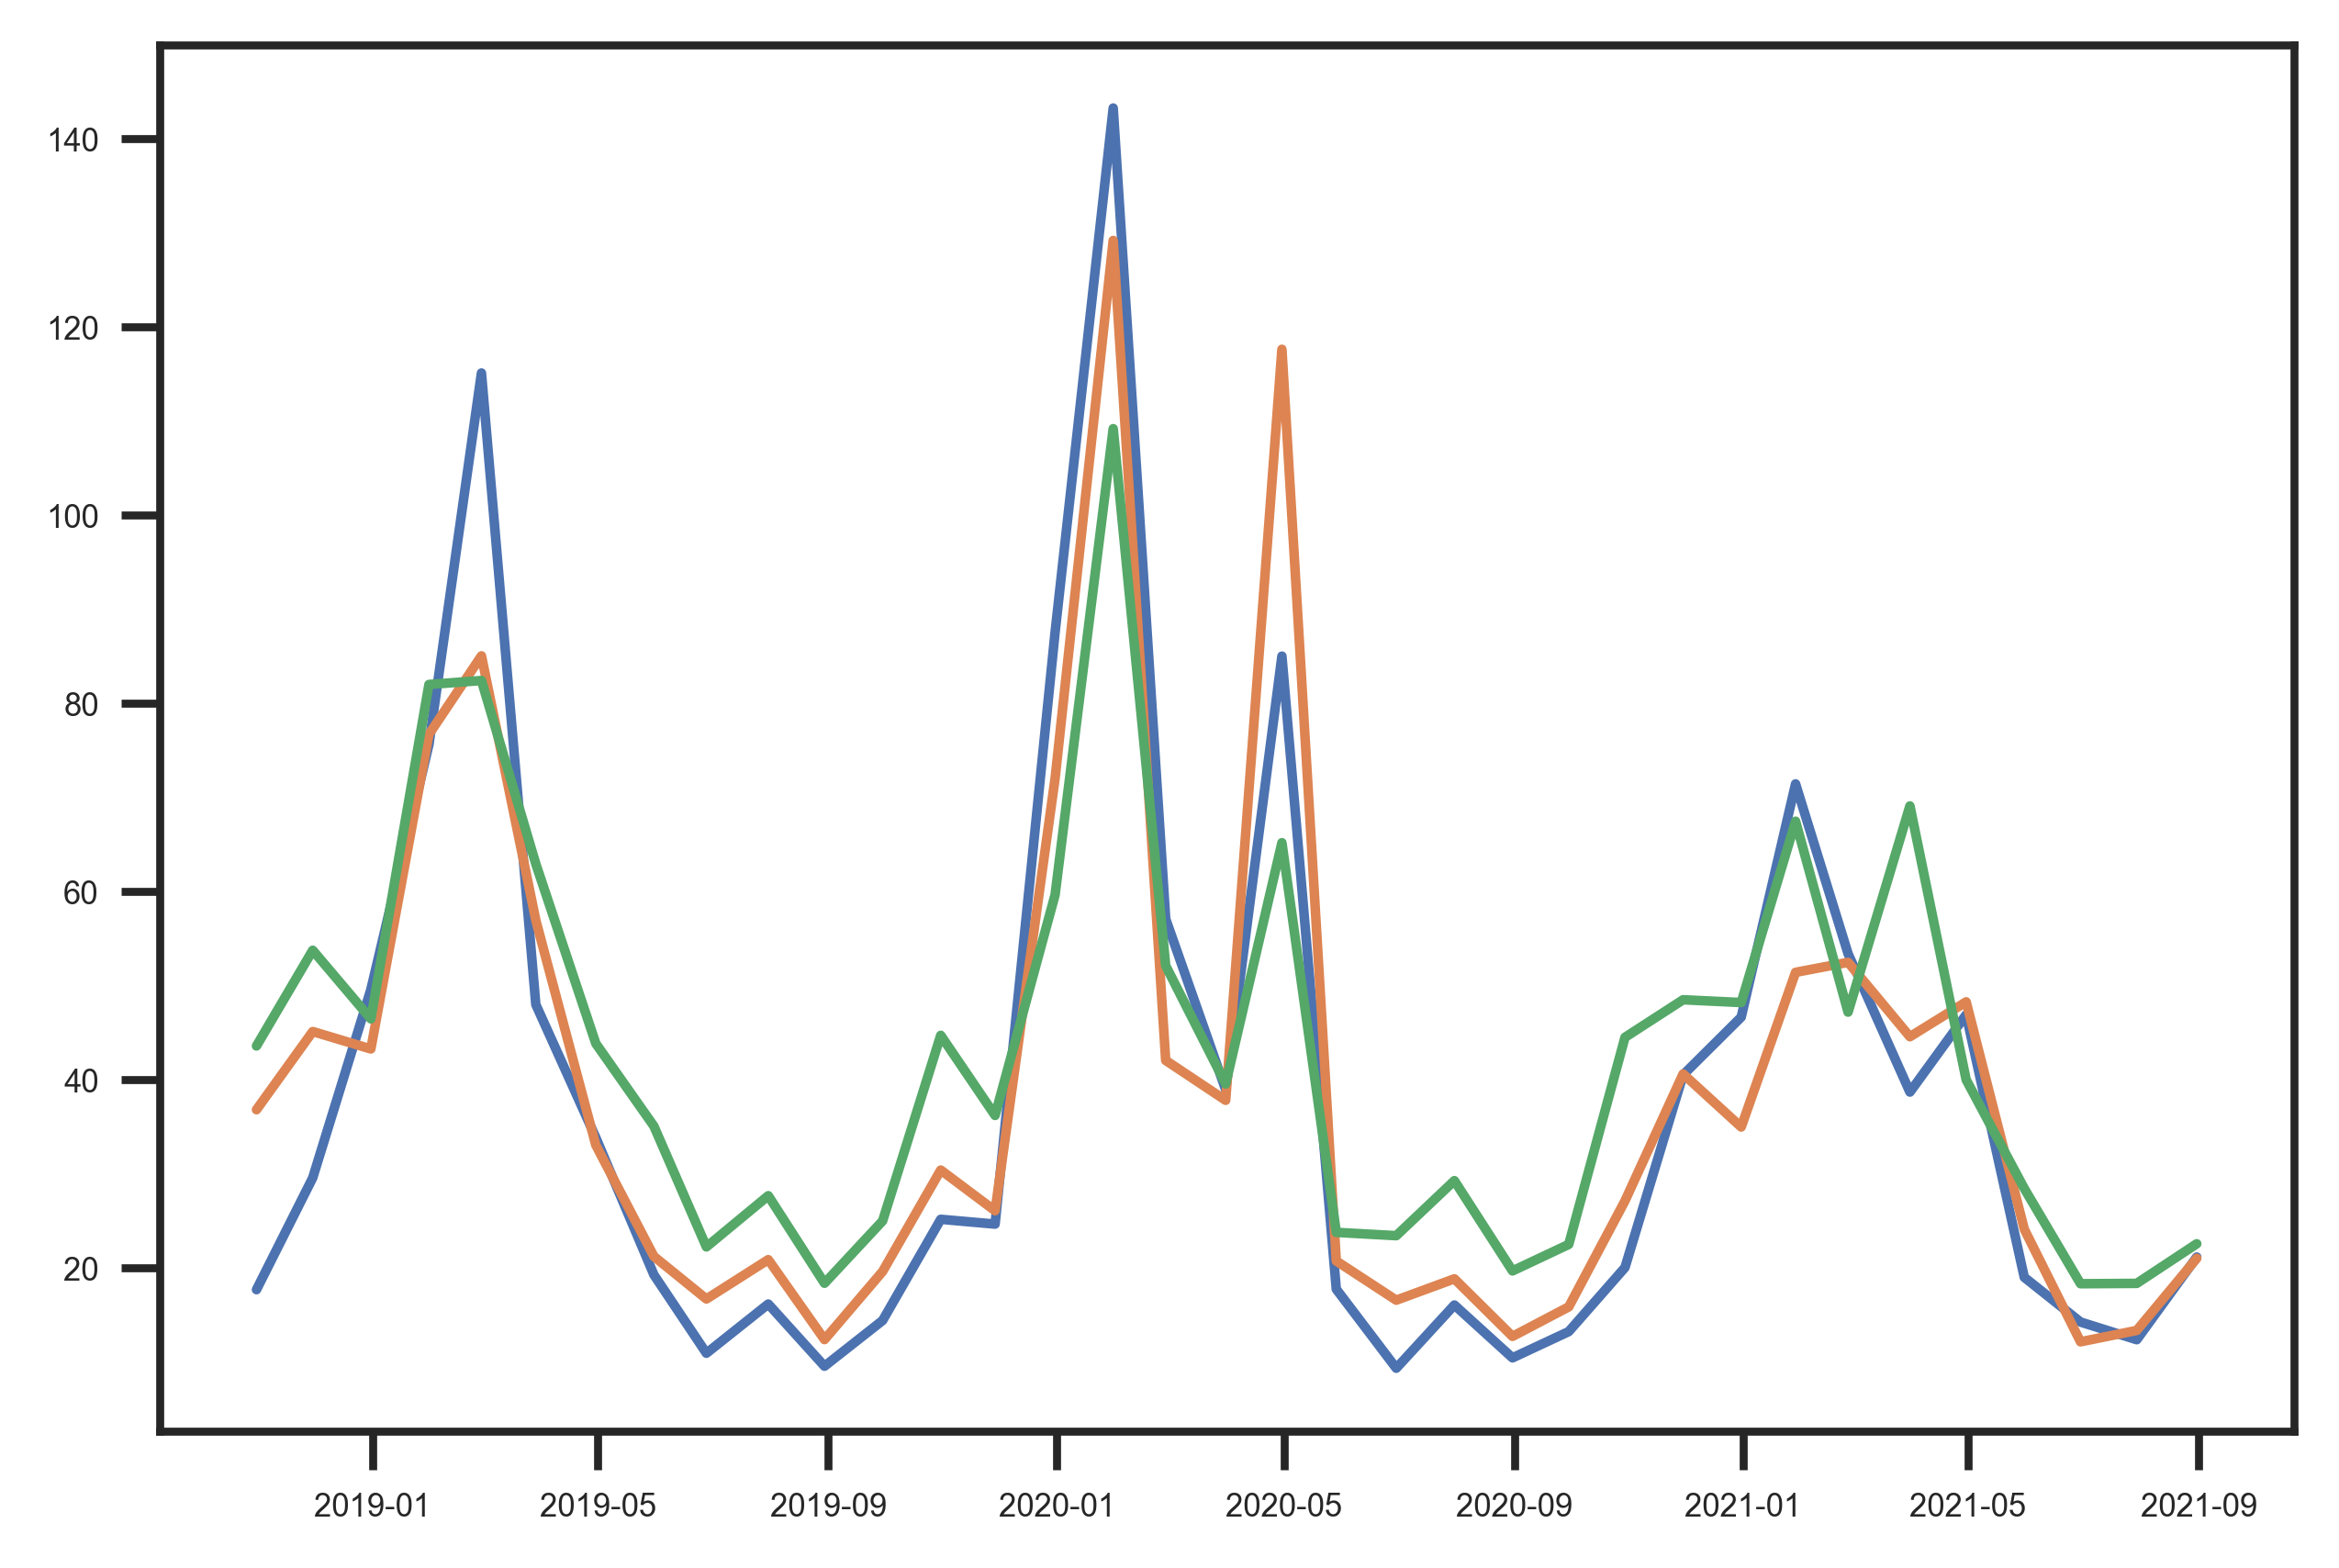

In [41]:
figure, ax0 = plt.subplots()
for i in range(len(class0_index)):
    plt.plot(X,class0_sample.iloc[i,:])
    plt.tick_params(labelsize=5)

In [16]:
class1_sample = dataset[dataset['class'] == 1].iloc[:,:35]
class1_index = class1_sample.index[:]
class1_index

Index(['上海市', '兰州市', '西宁市', '银川市', '南京市', '贵阳市', '南宁市', '杭州市'], dtype='object')

*Second cluster cantains 8 cities:'上海市', '兰州市', '西宁市', '银川市', '南京市', '贵阳市', '南宁市', '杭州市'*

*This picture is messier, since it has 8 cities, but we can also conclude that the pattern of changing are similiar.*

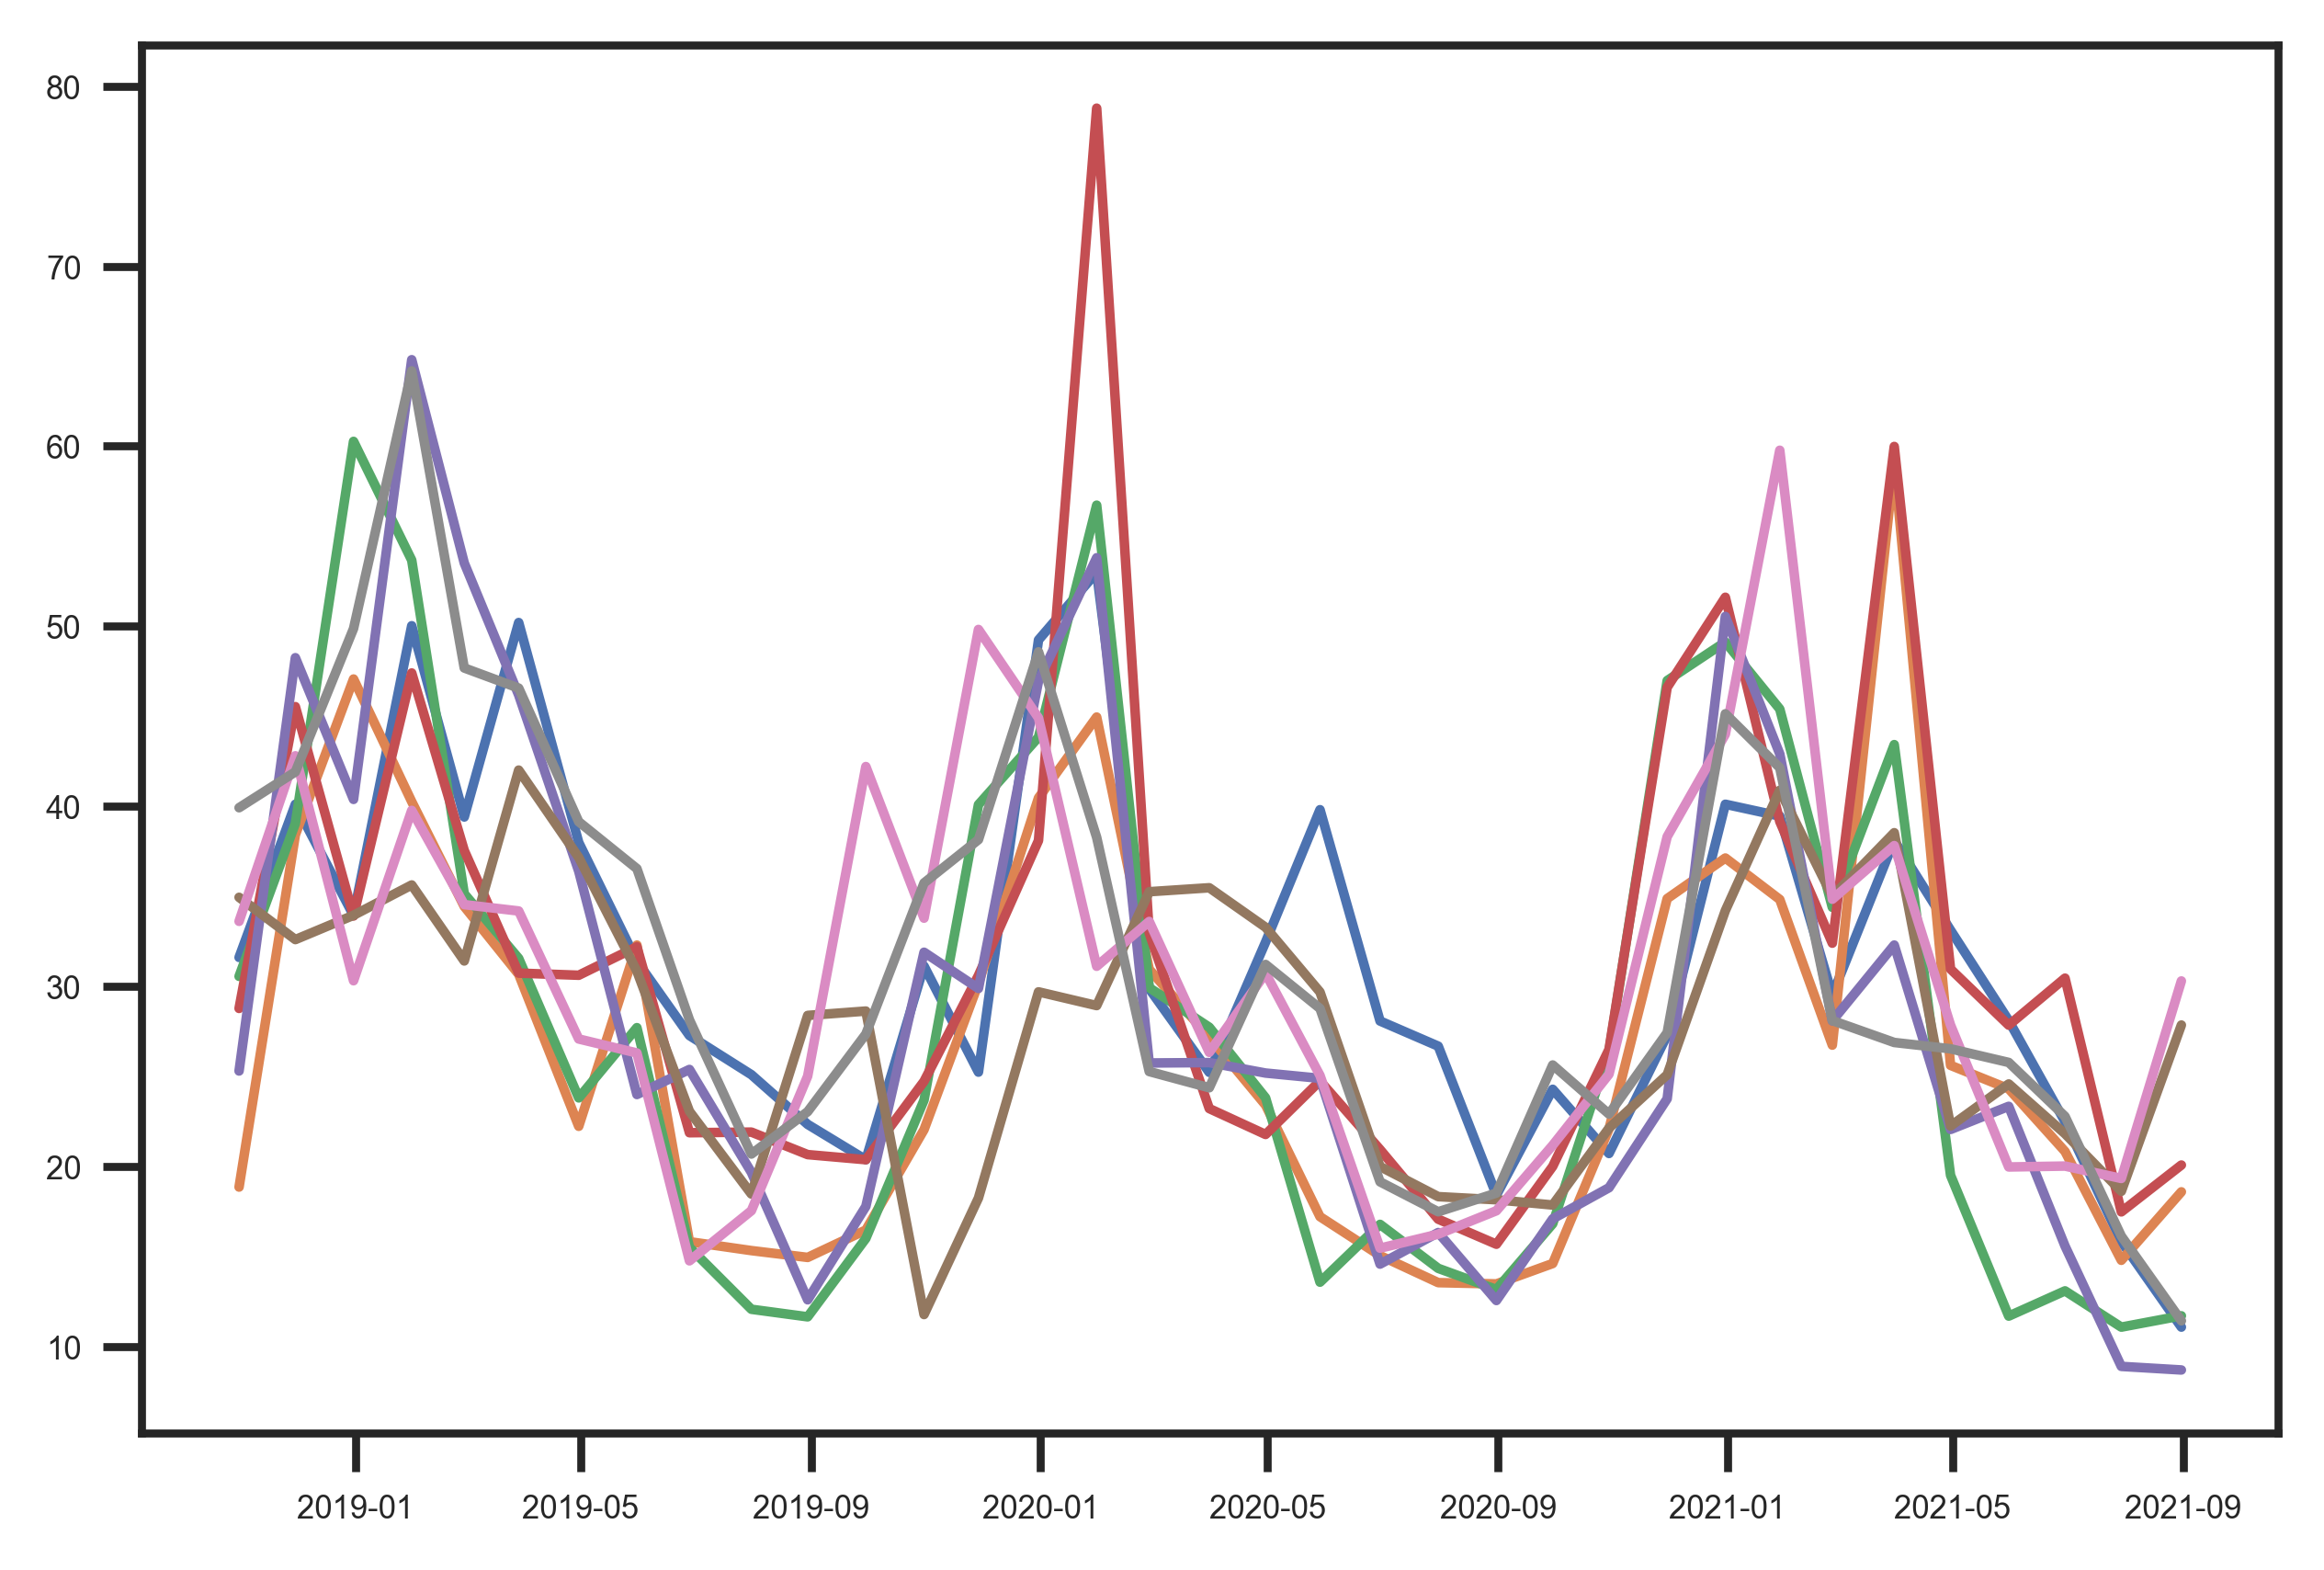

In [43]:
figure, ax1 = plt.subplots()
for i in range(len(class1_index)):
    plt.plot(X,class1_sample.iloc[i,:])
    plt.tick_params(labelsize=5)

In [18]:
class2_sample = dataset[dataset['class'] == 2].iloc[:,:35]
class2_index = class2_sample.index[:]
class2_index

Index(['昆明市', '拉萨市', '南昌市', '广州市', '福州市', '海口市'], dtype='object')

*Third cluster cantains 6 cities:'昆明市', '拉萨市', '南昌市', '广州市', '福州市', '海口市'*

*We can only conclude some seasonal trend from this picture, the same point is that the value are all below 50, which is much smaller than other cities.*

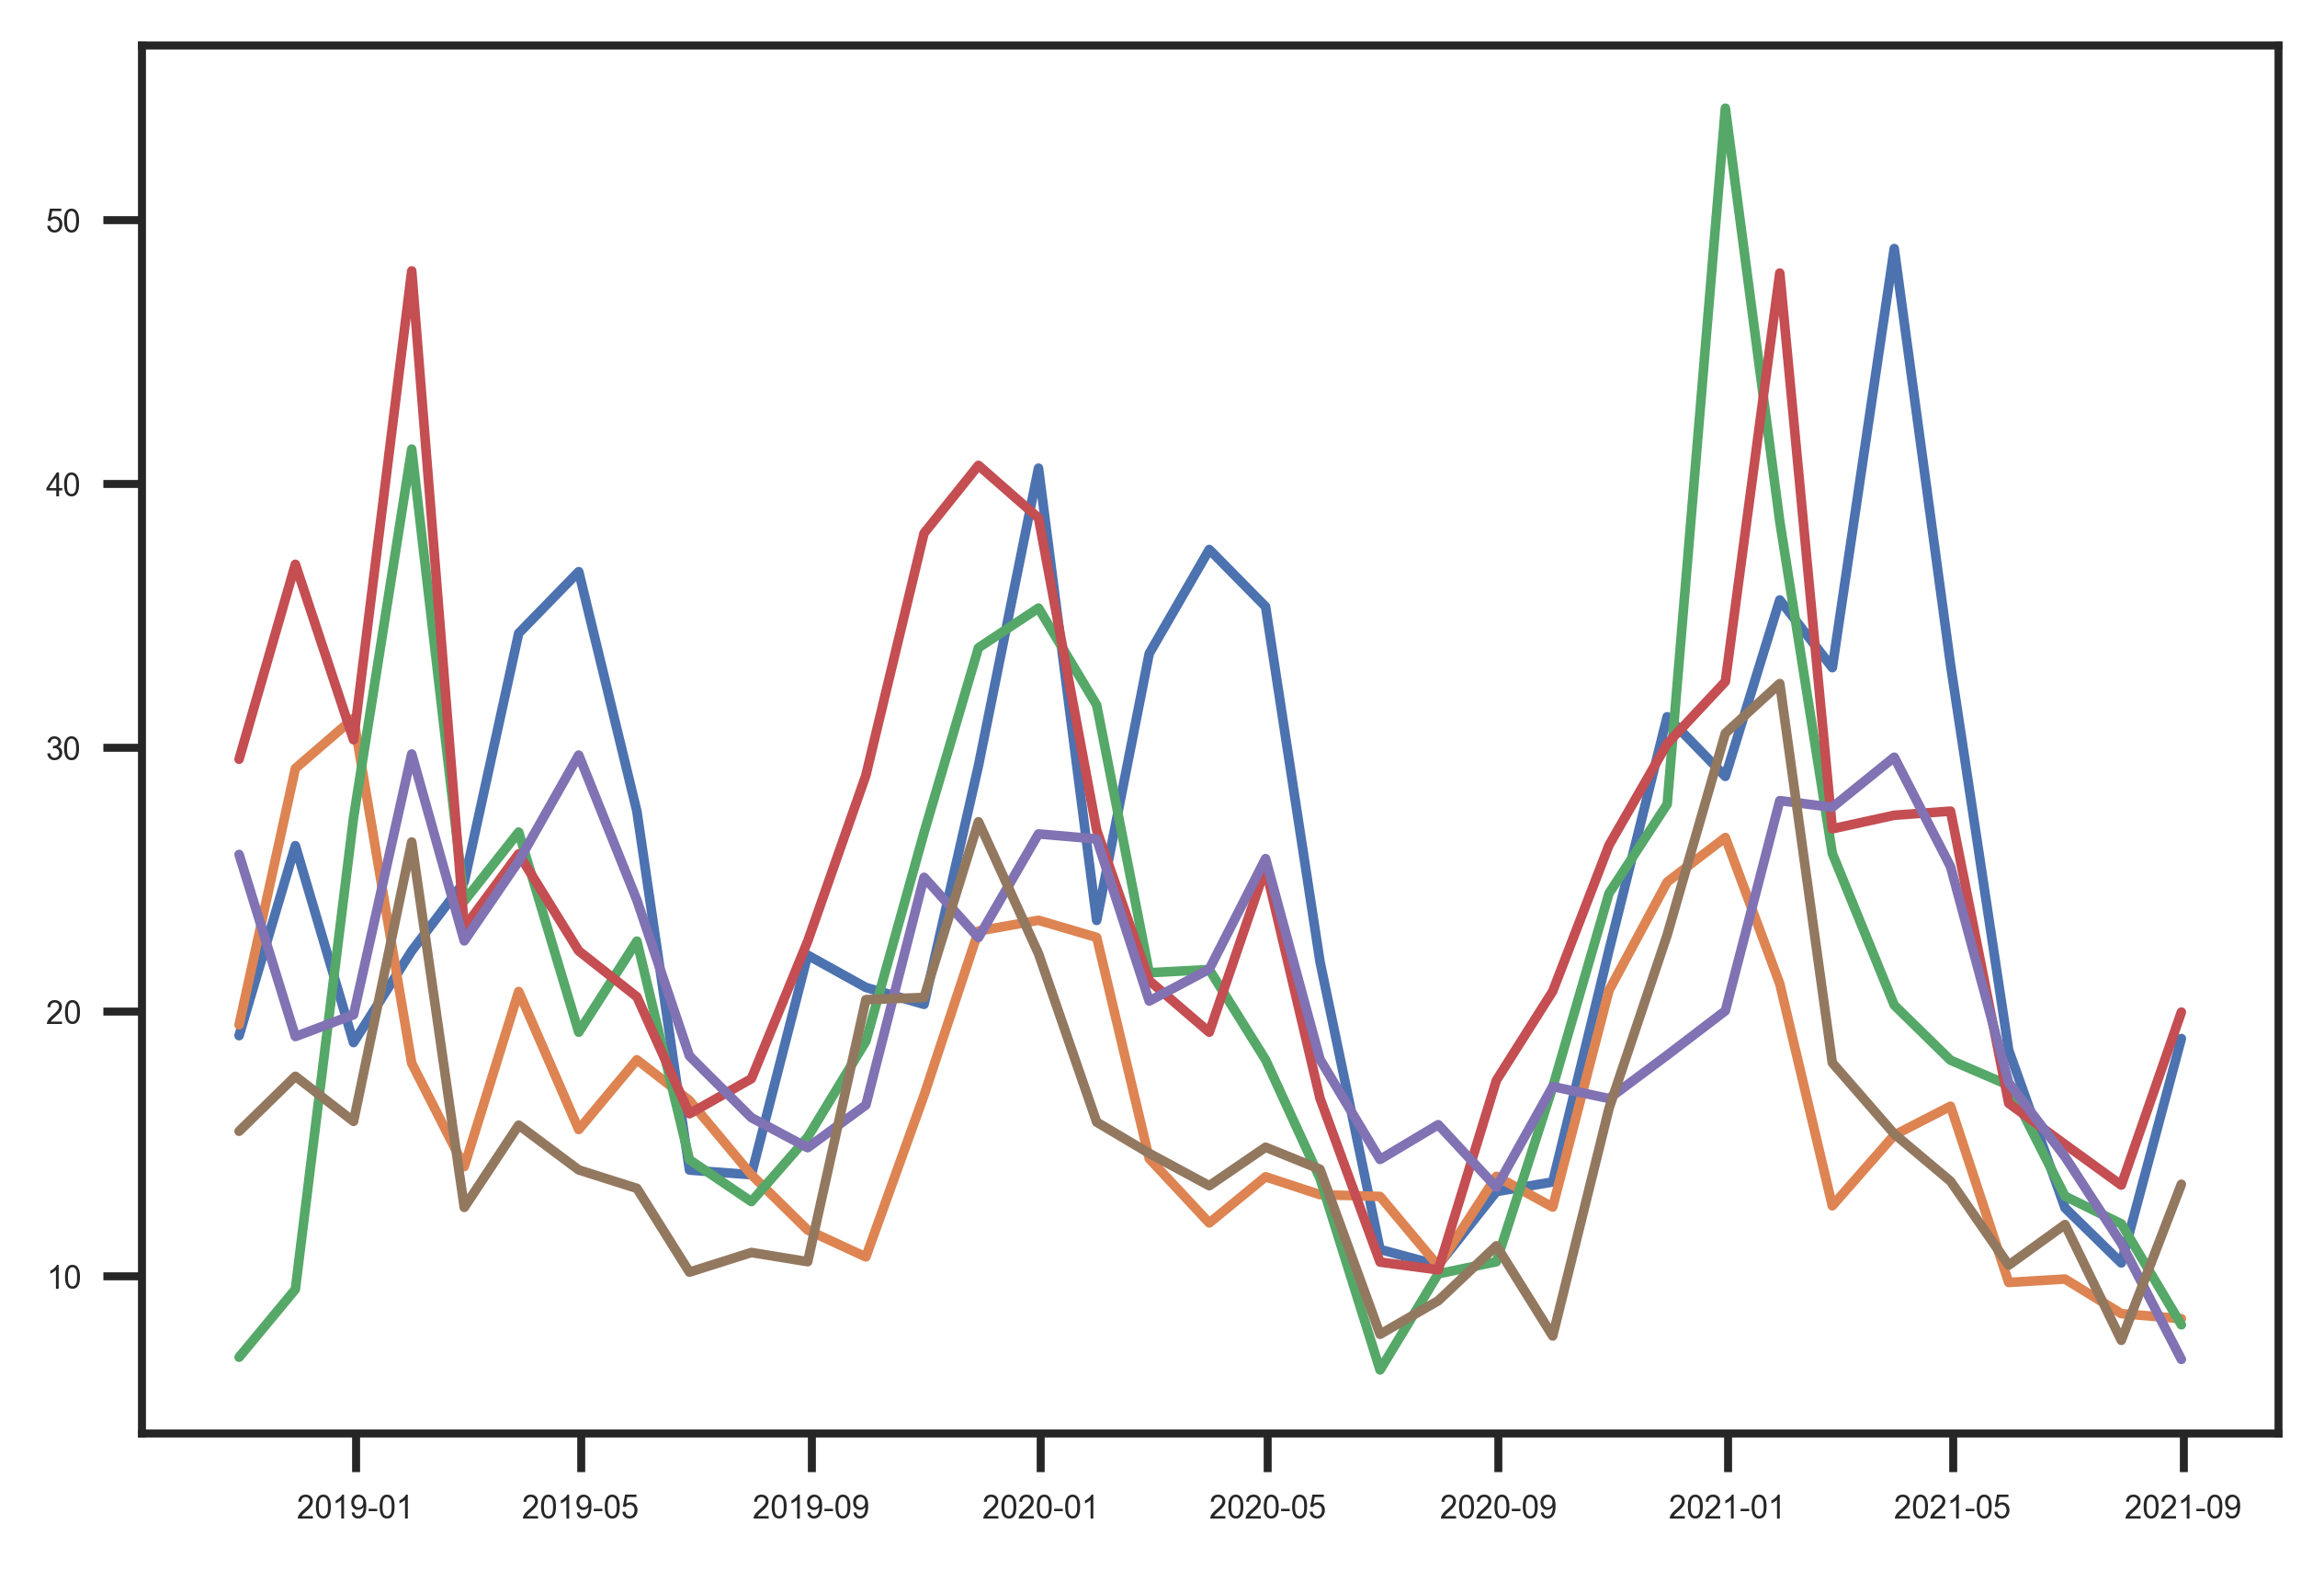

In [44]:
figure, ax2 = plt.subplots()
for i in range(len(class2_index)):
    plt.plot(X,class2_sample.iloc[i,:])
    plt.tick_params(labelsize=5)

In [20]:
class3_sample = dataset[dataset['class'] == 3].iloc[:,:35]
class3_index = class3_sample.index[:]
class3_index

Index(['乌鲁木齐市'], dtype='object')

*Fourth cluster only cantains 1 cities:'乌鲁木齐市'*

*The features of this city is obvious, and no one has the same trend as this city, so it beaome a singular cluter only with itself.*

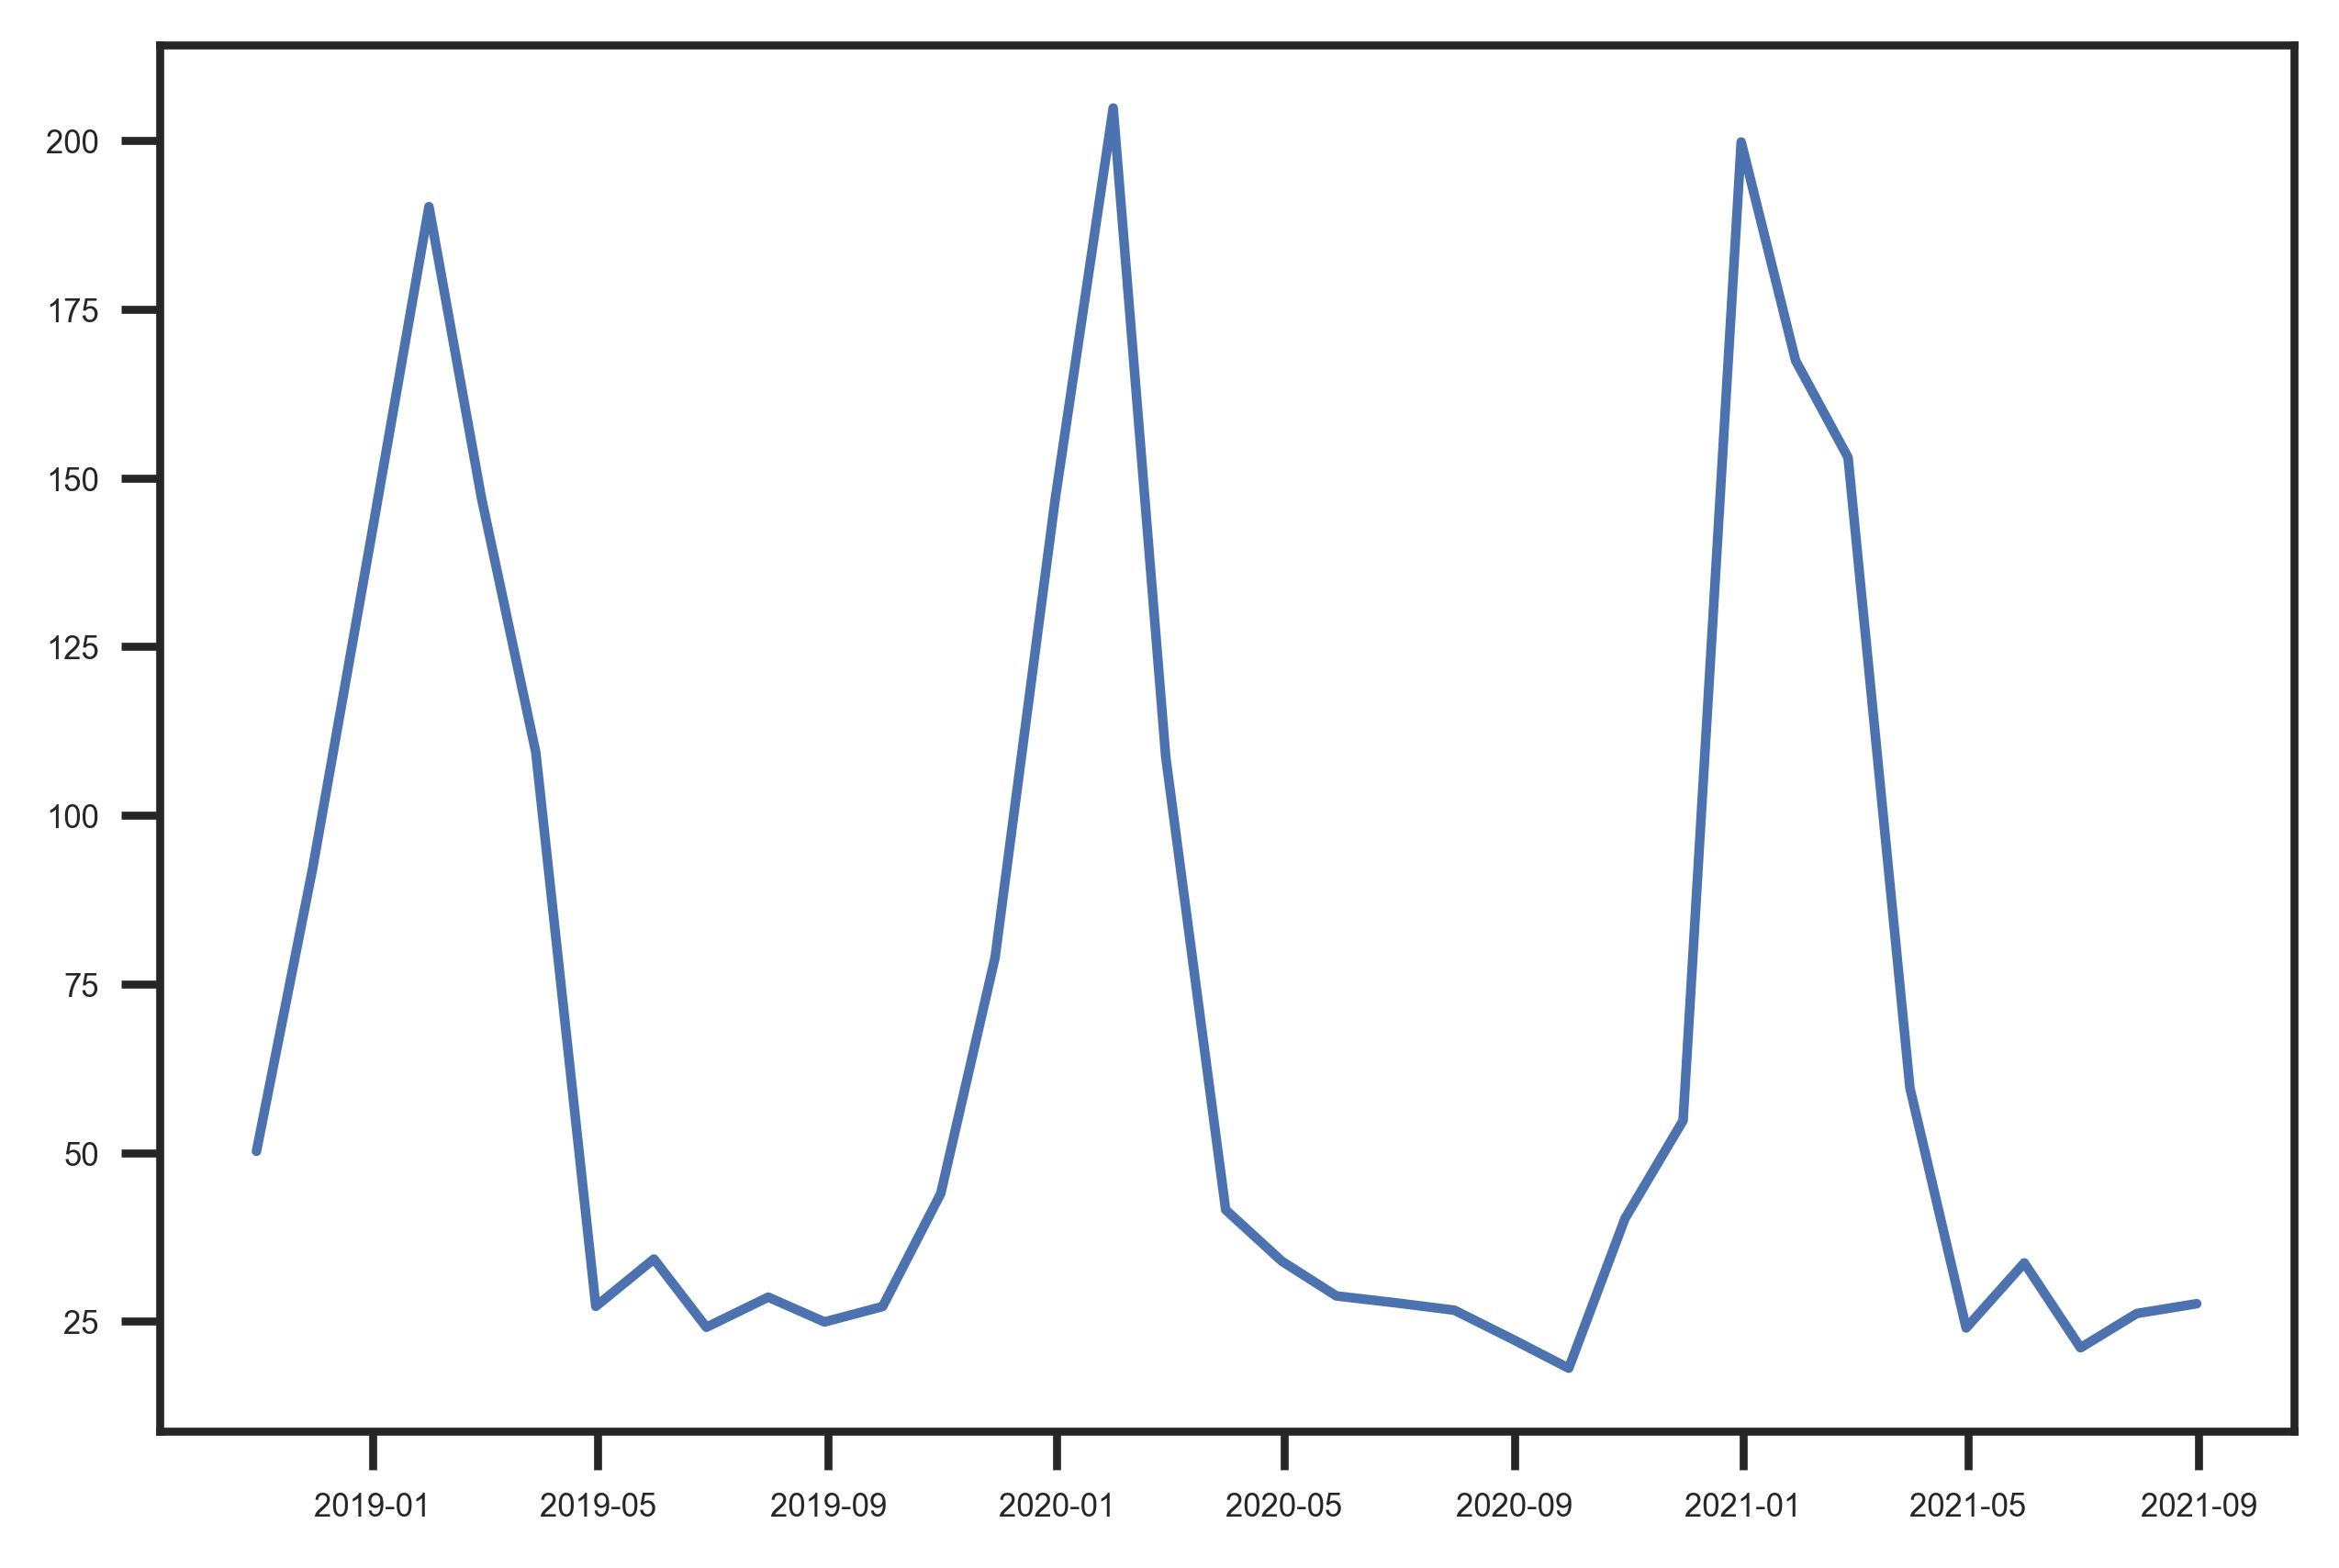

In [45]:
figure, ax3 = plt.subplots()
for i in range(len(class3_index)):
    plt.plot(X,class3_sample.iloc[i,:])
    plt.tick_params(labelsize=5)

In [22]:
class4_sample = dataset[dataset['class'] == 4].iloc[:,:35]
class4_index = class4_sample.index[:]
class4_index

Index(['济南市', '天津市', '西安市', '郑州市', '太原市'], dtype='object')

*Fifth cluster only cantains 5 cities:'济南市', '天津市', '西安市', '郑州市', '太原市'*

*The change of PM2.5 fllows the same direction, although hard to say this in recent years, but it is similar in 2019 and 2020.*

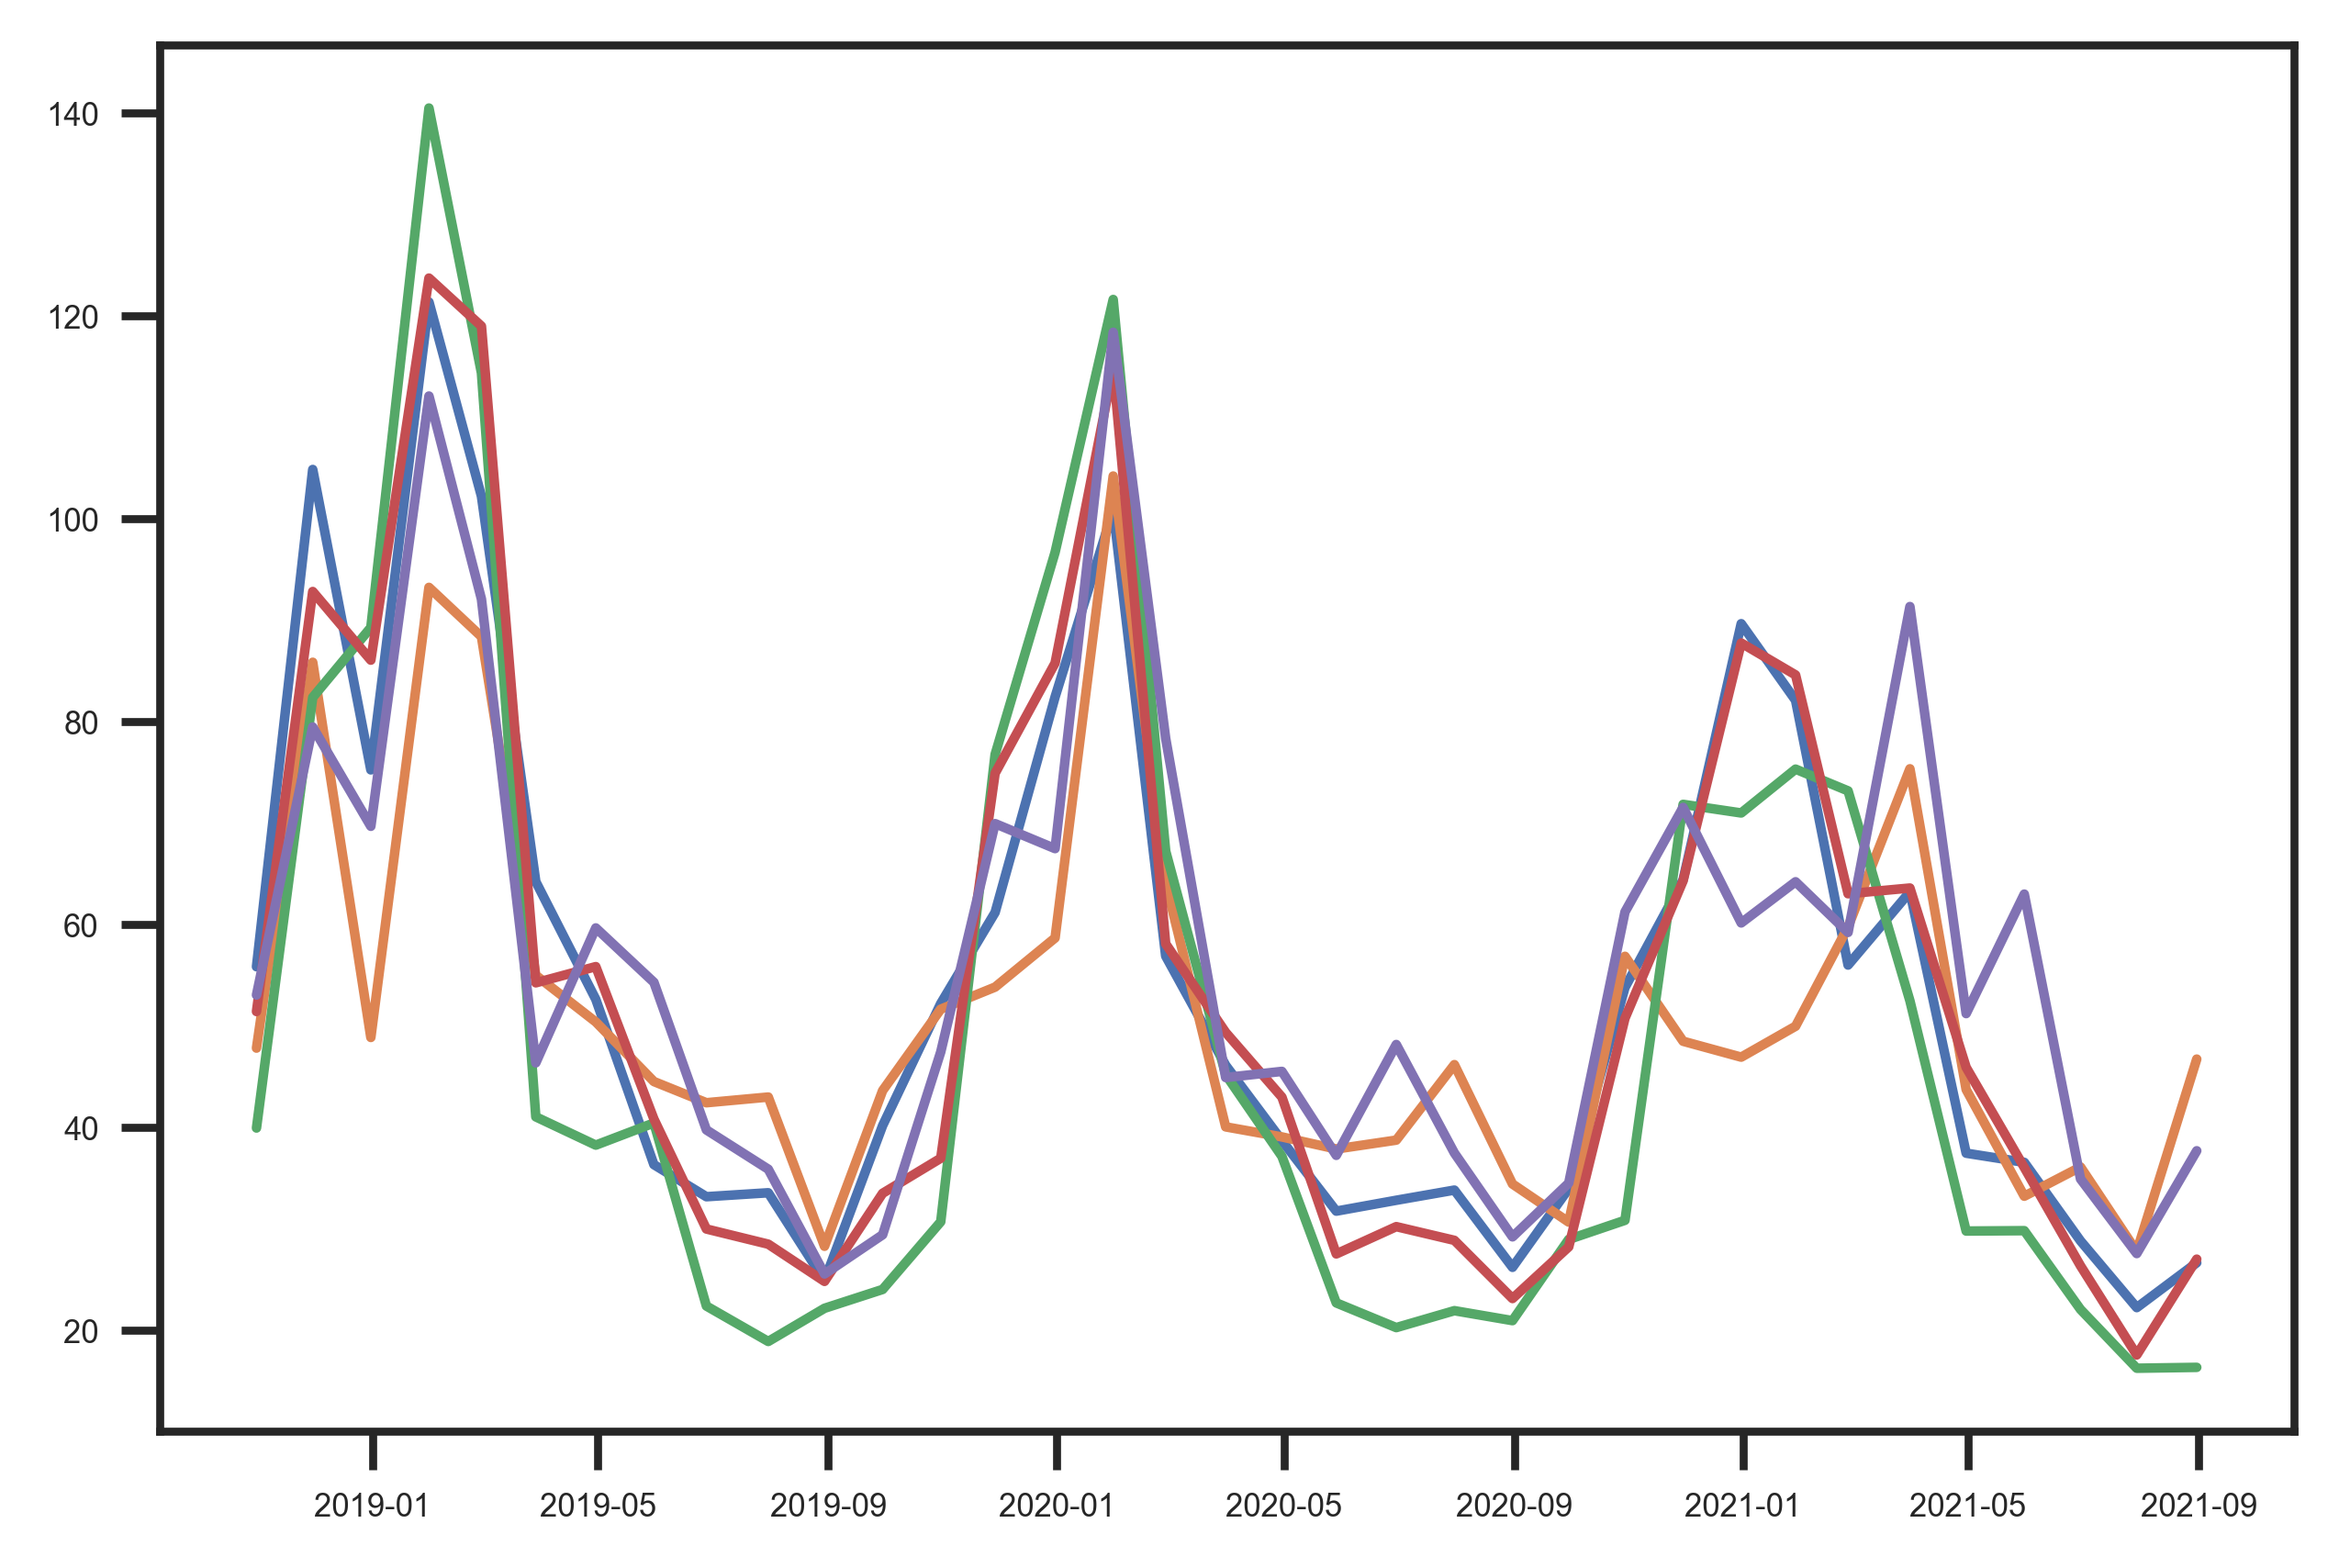

In [46]:
figure, ax4 = plt.subplots()
for i in range(len(class4_index)):
    plt.plot(X,class4_sample.iloc[i,:])
    plt.tick_params(labelsize=5)

In [48]:
class5_sample = dataset[dataset['class'] == 5].iloc[:,:35]
class5_index = class5_sample.index[:]
class5_index

Index(['北京市', '重庆市', '石家庄市', '合肥市', '武汉市', '长沙市', '成都市'], dtype='object')

*Sixth cluster only cantains 7 cities:'北京市', '重庆市', '石家庄市', '合肥市', '武汉市', '长沙市', '成都市'*

*All of them are inland cities, and the picture shows a similar patern.*

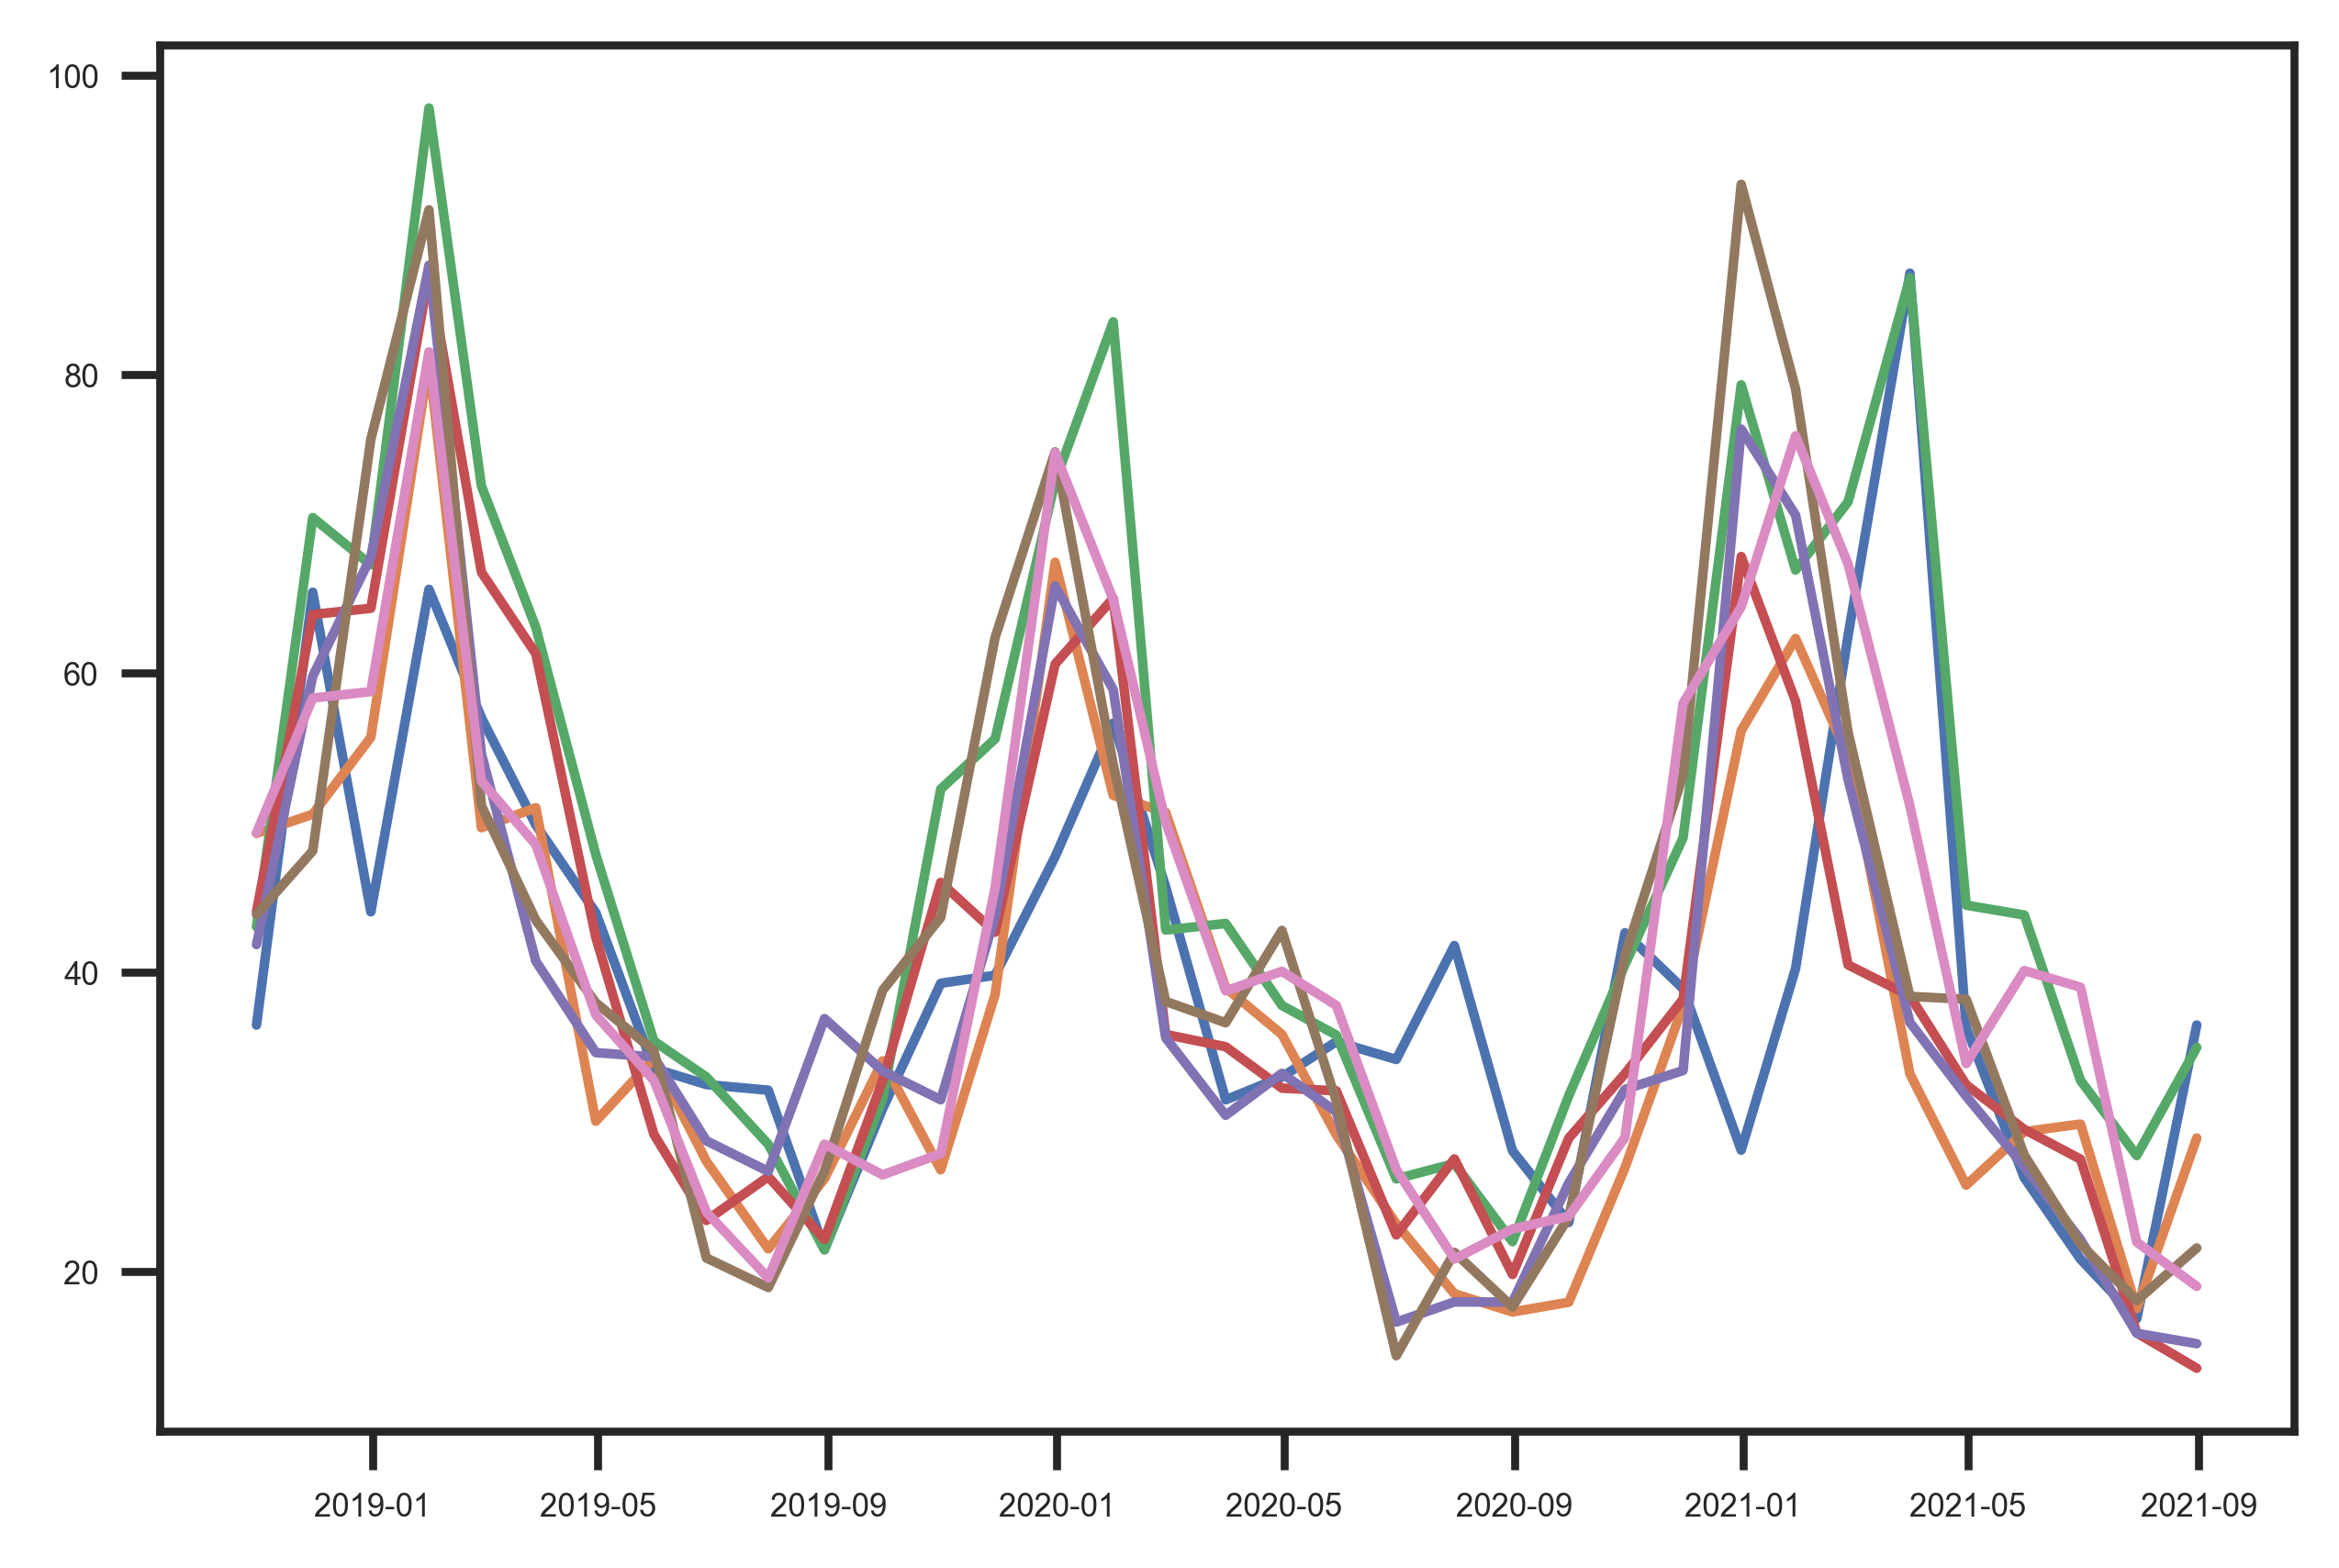

In [50]:
figure, ax5 = plt.subplots()
for i in range(len(class5_index)):
    plt.plot(X,class5_sample.iloc[i,:])
    plt.tick_params(labelsize=5)

*In order to show the overview of PM2.5 in each city, we calculate the average value wthin these 3 years, and illustrate them on China Map.(since the value in Inner Mongolia('呼和浩特市') missing so much values, and we remove this value, so from this picture we can see nothing about this city)*

In [54]:
mean_list = np.mean(pm_series.iloc[:,2:])
mean_list

济南市      54.357592
北京市      40.139684
上海市      31.401747
天津市      51.313866
重庆市      37.961132
哈尔滨市     38.644341
长春市      39.361173
沈阳市      43.462158
石家庄市     49.145064
乌鲁木齐市    71.029314
兰州市      26.824201
西宁市      28.294208
西安市      50.084509
银川市      31.521970
郑州市      54.536621
太原市      56.518682
合肥市      40.183642
武汉市      39.109607
长沙市      42.271617
南京市      28.970466
成都市      42.603198
贵阳市      28.137250
昆明市      24.694292
南宁市      30.609107
拉萨市      16.643203
杭州市      31.757223
南昌市      21.296236
广州市      25.470242
福州市      20.740592
海口市      15.814622
dtype: float64

In [1]:
from pyecharts.charts import Map,Geo
from pyecharts import options as opts

province_dict = {'Henan': 54.536621, 'Beijing': 40.139684, 'Hebei': 49.145064, 'Liaoning': 43.462158, 'Jinagxi':31.757223, 'Shanghai': 31.401747,
                 'Anhui': 40.183642, 'Jiangsu': 28.970466, 'Hunan': 42.271617,'Zhejiang': 31.757223, 'Hainan': 15.814622, 'Guangdong': 25.470242, 
                 'Hubei': 39.109607, 'Heilongjiang': 38.644341, 'Shaanxi': 50.084509, 'Sichuan': 28.970466, 'Chongqing': 37.961132, 
                 'Yunnan':24.694292, 'Guizhou': 28.137250, 'Jilin': 39.361173, 'Shanxi': 54.536621, 'Shandong': 54.357592, 'Fujian': 20.740592,
                 'Qinghai': 28.294208,'Tianjin': 51.313866, 'Tibet': 16.643203, 'Xinjiang':71.029314, 'Gansu': 26.824201,'Ningxia':31.521970,'Guangxi':30.609107}
name_map = {'河南':'Henan','北京':'Beijing','河北':'Hebei','辽宁':'Liaoning','江西':'Jinagxi','上海': 'Shanghai','安徽':'Anhui',
            '江苏': 'Jiangsu','湖南':'Hunan','浙江': 'Zhejiang','海南':'Hainan','广东':'Guangdong','湖北':'Hubei',
                    '黑龙江': 'Heilongjiang','陕西':'Shaanxi','四川': 'Sichuan','内蒙古':'Inner Mongolia','重庆':'Chongqing',
            '云南':'Yunnan','贵州':'Guizhou','吉林': 'Jilin','山西': 'Shanxi','山东':'Shandong','福建':'Fujian','青海':'Qinghai',
            '天津':'Tianjin','西藏':'Tibet','新疆':'Xinjiang','甘肃':'Gansu','宁夏':'Ningxia','广西':'Guangxi','澳门':'Macao','香港':'Honkong',
           '台湾':'Taiwan'}
province_char = [[item[0],item[1]] for item in province_dict.items()]
print(province_char)

map = Map(init_opts=opts.InitOpts(width='1200px', height='800px'))
map.set_global_opts(
    title_opts=opts.TitleOpts(title="Average PM2.5"),
    visualmap_opts=opts.VisualMapOpts(max_=50))
map.add("China Map Example", data_pair=province_char, maptype='china', is_roam=True,name_map = name_map)
map.render(path="map of China.html")
map.render_notebook()

[['Henan', 54.536621], ['Beijing', 40.139684], ['Hebei', 49.145064], ['Liaoning', 43.462158], ['Jinagxi', 31.757223], ['Shanghai', 31.401747], ['Anhui', 40.183642], ['Jiangsu', 28.970466], ['Hunan', 42.271617], ['Zhejiang', 31.757223], ['Hainan', 15.814622], ['Guangdong', 25.470242], ['Hubei', 39.109607], ['Heilongjiang', 38.644341], ['Shaanxi', 50.084509], ['Sichuan', 28.970466], ['Chongqing', 37.961132], ['Yunnan', 24.694292], ['Guizhou', 28.13725], ['Jilin', 39.361173], ['Shanxi', 54.536621], ['Shandong', 54.357592], ['Fujian', 20.740592], ['Qinghai', 28.294208], ['Tianjin', 51.313866], ['Tibet', 16.643203], ['Xinjiang', 71.029314], ['Gansu', 26.824201], ['Ningxia', 31.52197], ['Guangxi', 30.609107]]


*From the piture we can see that the pollution around Beijing is the most serious.*
*But interestingly, although Beijing is surrounded by heavily polluted cities, the pollution condition in Beijing is not serious. Mainly because the new policy in recent years has moved the factory out of Beijing*